# Визуализация данных

В Python cуществует большое множество библиотек для работы с графиками. Выбор подходящей библиотеки будет зависеть от:  
1) сколько времени вы готовы уделить визуализации
2) какой уровень "красоты" вам необходим (графики для презентации или просто посмореть зависимость)
3) нужна ли интерактивность графиков


Как вы видите есть две больших группы библиотек, у одних под капотом JavaScript (и эти библиотеки позволяют создавать интерактивные графики), другая группа основывается на Matplotlib (статичные графики). Если вы видите что у библиотеки одна связь с лагерем JavaScript, а вторая с Matplotlib, это как правило означает что создатели взяли возможности JavaScript, но синтаксис создания графиков заимствовали у Matplotlib.  
![landscape-colors.png](landscape-colors.png)

Посмотрите на примере галерей основые возможности разных библиотек по визуализации:
1. [Matplotlib](https://matplotlib.org/stable/gallery/index.html)
2. [Seaborn](https://seaborn.pydata.org/examples/index.html)
3. [Altair](https://altair-viz.github.io/gallery/index.html) - возможны статичные и интерактивные графики.
4. [Holoviews](https://holoviews.org/gallery/)
5. [Plotly](https://plotly.com/python/) - превратился в фреймворк для создания дашбордов. Некоторый функционал бесплатный.
6. [Bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html)

[Можете еще полистать презентацию.](https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017)

Стоит отметить, что есть еще большее множество узкоспециализированных библиотек по визуализации (для трейдинга и финансов, для статистики, для анализа временных рядов, для биоинформатики и т.д.)

# Import libs

**Установите следующие библиотеки:**
1. Matplotlib
2. Seaborn
3. Wordcloud
4. Bokeh
5. Plotly

In [3]:
# TODO: Install packages

In [2]:
import matplotlib.pyplot as plt

# Необходимо всегда выполнять эту команду, если вы хотите чтобы графики отображались в ноутбуке
%matplotlib inline 

import seaborn as sns
import pandas as pd
import re
import random
random.seed = 23  # фиксируем рандомизацию, чтобы работа воспроизводилась

In [3]:
import plotly.offline as pyo
import plotly.express as px
import plotly.figure_factory as pltly_ff
pyo.init_notebook_mode()

In [4]:
from bokeh.io import output_notebook as bkh_output_notebook, show  as bkh_show
from bokeh.plotting import figure as bkh_figure
bkh_output_notebook()

Loading BokehJS ...

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Данные

Данные - данные о [прокатных удостоверениях фильмов](https://opendata.mkrf.ru/opendata/7705851331-register_movies).

In [6]:
df = pd.read_csv("../lecture_5/data-7-structure-4.csv.zip", parse_dates=[3, 4, 37, 44, 46, 47])
print(f"{df.shape = }")
df.head()

df.shape = (96427, 48)


Название фильма Hаименование на иностранном языке Номер удостоверения  \
0        Почти знаменит                     Almost Famous           221006316   
1        Открытое окно.                       Open Window           221027814   
2      Открытый простор                        Open Range           221048915   
3  Особо важное задание                               NaN           111013716   
4          Особо опасен                            Wanted           221038416   

  Дата регистрации удостоверения Дата начала показа фильма  \
0      2016-02-09 12:00:00+00:00 2016-02-09 12:00:00+00:00   
1      2014-06-30 12:00:00+00:00 2014-06-30 12:00:00+00:00   
2      2015-11-27 12:00:00+00:00 2015-11-27 12:00:00+00:00   
3      2016-09-13 12:00:00+00:00 2016-09-13 12:00:00+00:00   
4      2016-10-10 12:00:00+00:00 2016-10-10 12:00:00+00:00   

                                          Примечание  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Показ фильма в кинозале и прокат фильма на мат...   
4                                                NaN   

   Идентификатор записи реестра  \
0                       2157027   
1                       2157028   
2                       2157029   
3                       2157030   
4                       2157031   

                                           Аннотация      Вид Фильма  \
0  В ролях: Фрэнсис МакДорманд, Кейт Хадсон. Исто...  Художественный   
1  В главных ролях: Робин Тюннин, Джоэль Эдгертон...  Художественный   
2  Драма-вестерн. В ролях: Роберт Дюволл, Кевин К...  Художественный   
3  В ролях - В.Заклунная, Н.Крючков, Е.Матвеев   ...  Художественный   
4  В ролях: Джеймс МакЭвой, Анджелина Джоли. Тайн...  Художественный   

  Категория  ...  Код Права проката переданы  \
0     Видео  ...   []                    NaN   
1     Видео  ...   []                    NaN   
2      Кино  ...   []                    NaN   
3      Кино  ...   []                    NaN   
4      Кино  ...   []                    NaN   

   Порядковый номер переоформления/продления Должность подписанта  \
0                                        NaN                  NaN   
1                                        NaN                  NaN   
2                                        NaN                  NaN   
3                                        NaN                  NaN   
4                                        NaN                  NaN   

  ФИО подписанта Запись удалена  Дата удаления записи  \
0            NaN            NaN                   NaT   
1            NaN            NaN                   NaT   
2            NaN            NaN                   NaT   
3            NaN            NaN                   NaT   
4            NaN            NaN                   NaT   

  Не показывать на сайте mkrf.ru     дата создания объекта  \
0                            NaN 2017-07-05 14:10:11+03:00   
1                            NaN 2017-07-05 14:10:11+03:00   
2                            NaN 2017-07-05 14:10:11+03:00   
3                            NaN 2017-07-05 14:10:11+03:00   
4                            NaN 2017-07-05 14:10:11+03:00   

    дата обновления объекта  
0 2018-04-09 09:12:02+03:00  
1 2018-04-09 09:12:02+03:00  
2 2018-04-09 09:12:02+03:00  
3 2018-04-09 09:12:02+03:00  
4 2021-04-06 12:16:16+03:00  

[5 rows x 48 columns]

## Год производства

In [7]:
df["Год производства"].value_counts()

2006            4177
2005            3721
2009            3399
2004            3376
2003            3312
                ... 
20009              1
1919 - 1920        1
1933-1935          1
2010А.Фрумин       1
2020-2022          1
Name: Год производства, Length: 1243, dtype: int64

Напишем функцию, которая будет чистить значения и доставать первое значение из 4 цифр.

In [8]:
def get_year(x):
    if type(x) == str:
        res = re.findall("[0-9]{4}", x)
        if res:
            return int(res[0])
    return x

In [9]:
df["Год производства"] = df["Год производства"].apply(get_year)

In [26]:
df["Год производства"].apply(type).value_counts()

<class 'int'>      96215
<class 'float'>      211
<class 'str'>          1
Name: Год производства, dtype: int64

In [27]:
df.loc[df["Год производства"].apply(type) == str, ['Год производства']]

Год производства
83191              199

In [28]:
df.loc[df["Год производства"].apply(type) == str, ['Год производства']] = 1990
df["Год производства"].apply(type).value_counts()

<class 'int'>      96216
<class 'float'>      211
Name: Год производства, dtype: int64

## Метраж (для фильмов на кинопленке)

In [10]:
metrag = "Метраж (для фильмов на кинопленке)"
df[metrag].apply(type).value_counts()

<class 'float'>    94335
<class 'str'>       2092
Name: Метраж (для фильмов на кинопленке), dtype: int64

In [11]:
df.loc[df[metrag].apply(type) == str, [metrag]].head()

Метраж (для фильмов на кинопленке)
2                               2923
3                               3782
4                               3014
5                               3014
6                               3014

In [16]:
df[metrag] = df[metrag].apply(lambda x: float(x.strip().split(' ')[0].replace(',', '.')) if type(x) is str else x)

In [17]:
df[metrag].apply(type).value_counts()

<class 'float'>    96427
Name: Метраж (для фильмов на кинопленке), dtype: int64

## Вид Фильма

In [18]:
df["Вид Фильма"].value_counts()

Художественный                    49470
Прочие                            13567
Анимационный                      11207
Документальный                     9682
 Художественный                    7353
Научно-популярный                  4273
Кинопериодика                       533
Прочее (Учебный, Спектакль, …)      302
Музыкально-развлекательный           24
научно-популярный                     4
Прочий                                2
 Анимационный                         2
документальный                        2
Документальный                        1
Name: Вид Фильма, dtype: int64

In [19]:
df["Вид Фильма"] = df["Вид Фильма"].apply(lambda x: x.strip().split(' ')[0].strip().lower().capitalize() if type(x) is str else 'NA')
df["Вид Фильма"] = df["Вид Фильма"].replace({"Прочее": 'Прочие', "Прочий": "Прочие"})
df["Вид Фильма"].value_counts()

Художественный                56823
Прочие                        13871
Анимационный                  11209
Документальный                 9685
Научно-популярный              4277
Кинопериодика                   533
Музыкально-развлекательный       24
NA                                5
Name: Вид Фильма, dtype: int64

## Продолжительность демонстрации, минуты

In [20]:
duration = "Продолжительность демонстрации, минуты"
df[duration].apply(type).value_counts()

<class 'float'>    82186
<class 'str'>      14241
Name: Продолжительность демонстрации, минуты, dtype: int64

In [21]:
df.loc[df[duration].apply(type) == str, [duration]].head()

Продолжительность демонстрации, минуты
81920                                     50
81921                                     50
81923                                     30
81924                                     35
81925                                     35

In [22]:
df[duration] = df[duration].apply(lambda x: float(x.split('/')[0]) if type(x) is str else x)

In [23]:
df[duration].apply(type).value_counts()

<class 'float'>    96427
Name: Продолжительность демонстрации, минуты, dtype: int64

# Основные виды графиков:
**1) Line Chart  
2) Scater Plot  
3) Bar Chart  
4) Pie Chart  
5) Histogram + Distlot  
6) Heatmap  
7) Wordcloud**

## Line Chart
Самый стандартный график, точки по х и у соединены линиями.

### Matplotlib

X: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Y: [16, 35, 32, 73, 50, 72, 72, 147, 82, 135]


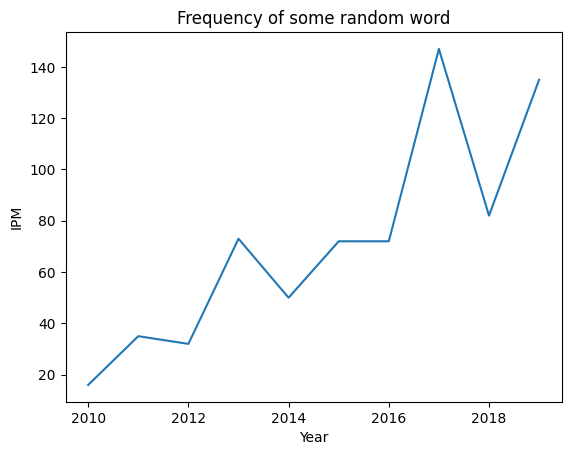

In [24]:
X = list(range(2010, 2020))
Y = [random.randint(i*10, (i+1)*20) for i in range(len(X))]

print('X:', X)
print('Y:', Y)

plt.plot(X, Y) # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.title('Frequency of some random word') # заголовок
plt.ylabel('IPM') # подпись оси Х
plt.xlabel('Year') # подпись оси Y
plt.show()

### Pandas

Построим похожий график по кол-ву фильмов в каждый год.
Посмотрим, какие значения года. Там есть некачественно заполненные данные.

In [29]:
year_production = df["Год производства"].value_counts().sort_index()
year_production

1902       1
1908       3
1909      12
1910      11
1911      24
        ... 
2019    2152
2020    1764
2021    1901
2022     744
2099       1
Name: Год производства, Length: 117, dtype: int64

In [30]:
type(year_production)

pandas.core.series.Series

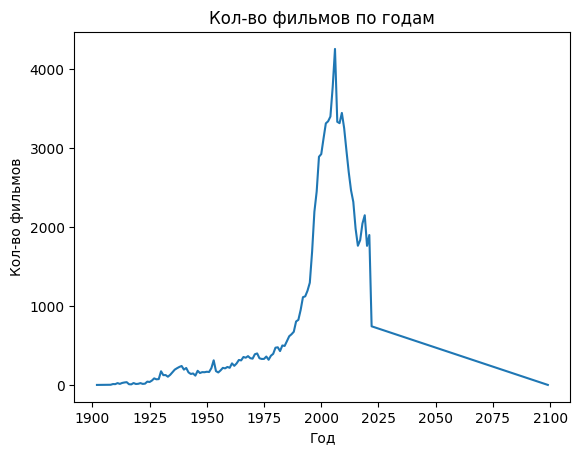

In [31]:
year_production.plot(
    title="Кол-во фильмов по годам", 
    xlabel="Год",
    ylabel="Кол-во фильмов"
);

### Plotly

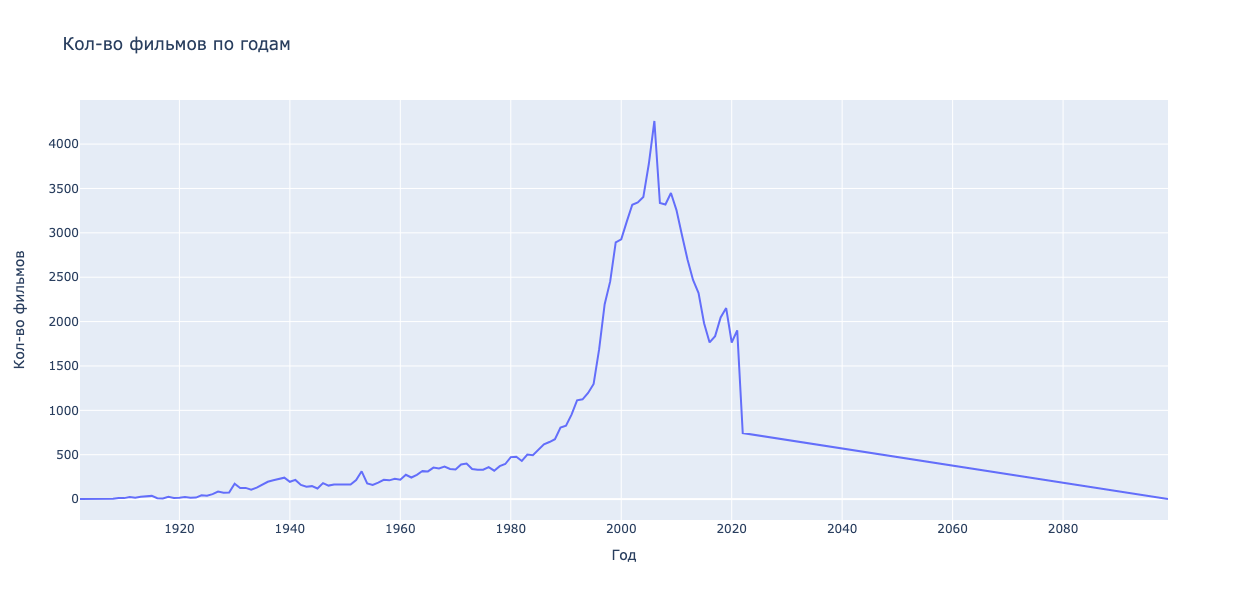

In [33]:
fig = px.line(x=year_production.index, y=year_production, title="Кол-во фильмов по годам", 
              labels={"x": "Год", "y": "Кол-во фильмов"},
              markers=False,
              width=1000, height=600
             )
fig.show()

### Bokeh

In [35]:
p = bkh_figure(
    plot_width=600, plot_height=400,
    x_axis_label="Год",
    y_axis_label= "Кол-во фильмов",
    title="Кол-во фильмов по годам"
)
# add a line renderer
p.line(year_production.index, year_production, line_width=2)

bkh_show(p) # show the results

## Scatter plot

Точки, как и раньше, задаются по х и у, но теперь не соединяются линиями. Такие гарфики используются для отображения наблюдений в эксперименте, когда есть два параметра, которые могут принимать различные значения и нужно показать, какие комбинации есть и как они раположены.

### Matplotlib

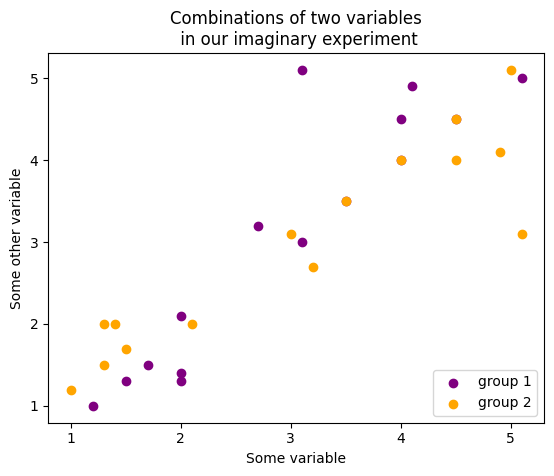

In [36]:
X = [1.2, 2, 3.1, 4, 5.1, 1.7, 1.5, 3.5, 4.5, 4, 2, 2, 2.7, 3.1, 4.1]
Y = [1, 1.4, 3, 4, 5, 1.5, 1.3, 3.5, 4.5, 4.5, 1.3, 2.1, 3.2, 5.1, 4.9]

plt.scatter(X, Y, color='purple', label='group 1') # меняем цвет, добавляем label
plt.scatter(Y, X, color='orange', label='group 2') # нарисуем еще какие-то значения на том же графике
plt.title('Combinations of two variables\n in our imaginary experiment') # перенос строки
plt.ylabel('Some other variable')
plt.xlabel('Some variable')
plt.legend(loc='lower right') # автоматический поиск места для легенды
plt.show()

### Pandas

Посмотрим на соотношение длины пленки и длины фильма (на примере первых фильмов в списке)

In [37]:
sample_df = df[[
    "Метраж (для фильмов на кинопленке)", 
    "Продолжительность демонстрации, часы", 
    "Продолжительность демонстрации, минуты"
]].head(100)

sample_df["length"] = sample_df["Продолжительность демонстрации, часы"] * 60 + sample_df["Продолжительность демонстрации, минуты"]

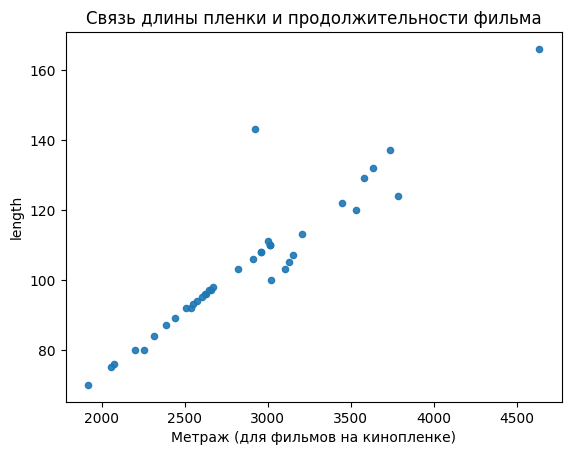

In [39]:
sample_df.plot(
    kind='scatter',
    x="Метраж (для фильмов на кинопленке)", 
    y="length",
    title="Связь длины пленки и продолжительности фильма",
    alpha=0.9
);

### Plotly

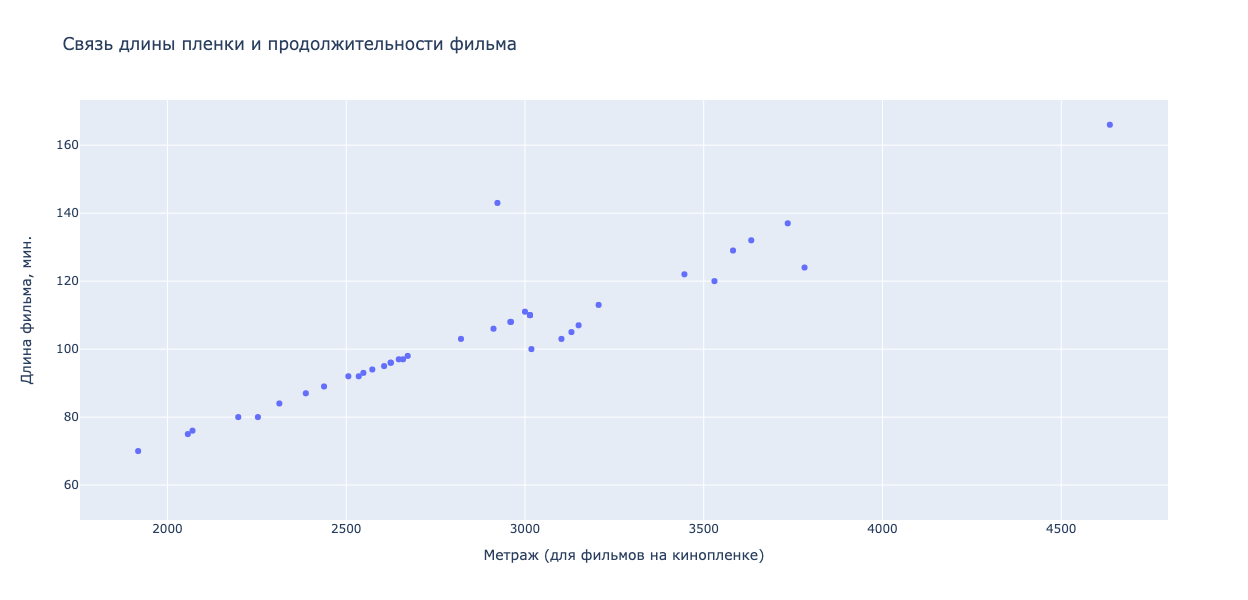

In [82]:
fig = px.scatter(
    sample_df, x="Метраж (для фильмов на кинопленке)", y="length", title="Связь длины пленки и продолжительности фильма", 
    labels={"length": "Длина фильма, мин."},
    width=1000, height=600
)
fig.show()

### Bokeh

In [42]:
p = bkh_figure(
    plot_width=1000, plot_height=600,
    x_axis_label="Метраж (для фильмов на кинопленке)",
    y_axis_label= "Длина фильма, мин.",
    title="Связь длины пленки и продолжительности фильма"
)

# add a line renderer
p.circle(sample_df["Метраж (для фильмов на кинопленке)"], sample_df["length"])
bkh_show(p) # show the results

Видно, что есть очевидная зависимость и можно посчитать, какая длина пленки соответствует минуте фильма

## Bar Chart
Столбчатая диграмма - для категориальных данных по х и чисел по у.   
Например, построим диаграмму количества ругательств, которые произносил человек в разные дни недели.

### Matplotlib

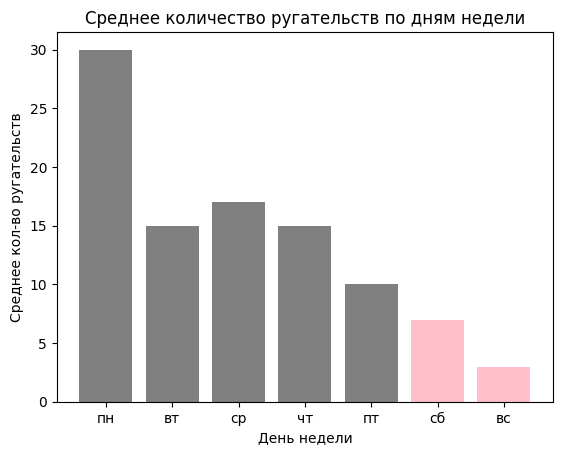

In [43]:
X = [1, 2, 3, 4, 5]
X2 = [6, 7] # сделаем выходные отдельно
Y = [30, 15, 17, 15, 10]
Y2 = [7, 3]
DAYS = ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']
plt.bar(X, Y, color='grey')
plt.bar(X2, Y2, color='pink')
plt.xticks(ticks=X+X2, labels=DAYS)
plt.title('Среднее количество ругательств по дням недели')
plt.ylabel('Среднее кол-во ругательств')
plt.xlabel('День недели')
plt.show()

Посмотрим на то, в какие дни начинается показ фильмов. Кажется, что день премьеры - четверг. Но в данных это не так.  
Применим функцию для извлечения номера дня недели из объекта типа дата.

In [44]:
tmp_date = df["Дата начала показа фильма"][0]
type(tmp_date), tmp_date

(pandas._libs.tslibs.timestamps.Timestamp,
 Timestamp('2016-02-09 12:00:00+0000', tz='UTC'))

In [45]:
df["Дата начала показа фильма"].apply(lambda x: x.weekday()).value_counts().sort_index()

0.0    19729
1.0    19667
2.0    17959
3.0    20535
4.0    15929
5.0     1456
6.0      724
Name: Дата начала показа фильма, dtype: int64

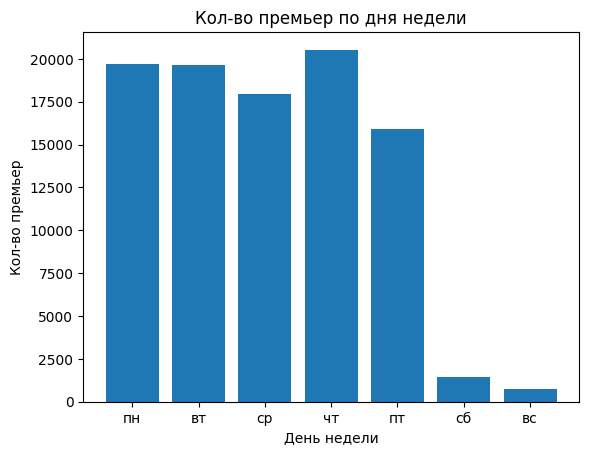

In [47]:
plt.bar(
    x=["пн", "вт", "ср", "чт", "пт", "сб", "вс"],
    height=df["Дата начала показа фильма"].apply(lambda x: x.weekday()).value_counts().sort_index()
)
plt.title("Кол-во премьер по дня недели")
plt.ylabel("Кол-во премьер")
plt.xlabel("День недели")
plt.show()

### Pandas

In [48]:
df["Вид Фильма"].value_counts()

Художественный                56823
Прочие                        13871
Анимационный                  11209
Документальный                 9685
Научно-популярный              4277
Кинопериодика                   533
Музыкально-развлекательный       24
NA                                5
Name: Вид Фильма, dtype: int64

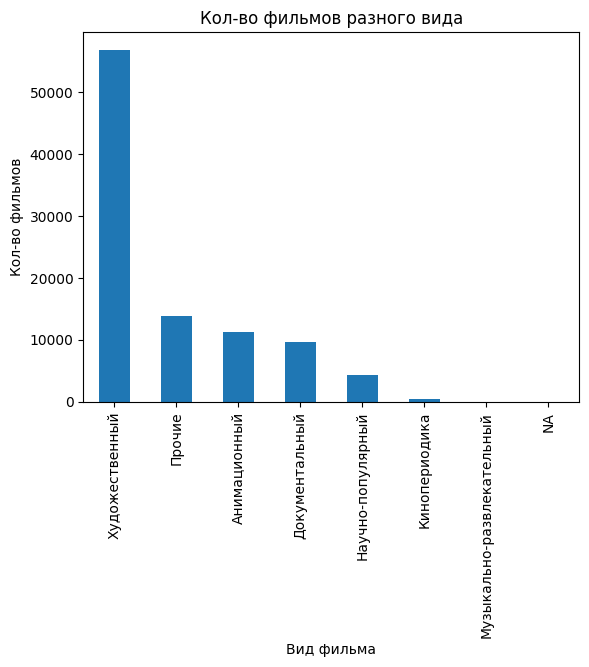

In [49]:
df["Вид Фильма"].value_counts().plot(
    kind='bar',
    title="Кол-во фильмов разного вида",
    xlabel="Вид фильма",
    ylabel="Кол-во фильмов"
);

### Plotly

In [50]:
film_type = df["Вид Фильма"].value_counts().to_frame('Кол-во фильмов').\
    reset_index().rename(columns={'index':"Вид Фильма"})
film_type.head()

Вид Фильма  Кол-во фильмов
0     Художественный           56823
1             Прочие           13871
2       Анимационный           11209
3     Документальный            9685
4  Научно-популярный            4277

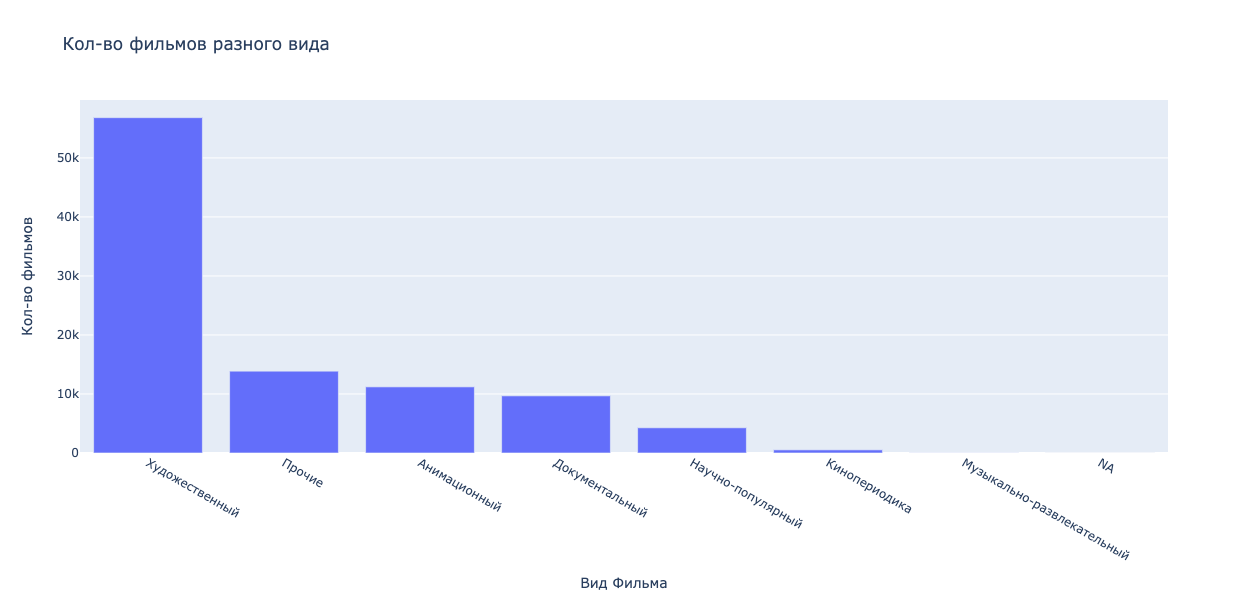

In [51]:
fig = px.bar(
    film_type, x="Вид Фильма", y='Кол-во фильмов',
    title="Кол-во фильмов разного вида", 
    width=1000, height=600
)
fig.show()

### Bokeh

In [52]:
p = bkh_figure(
    plot_width=1000, plot_height=600,
    x_range=film_type["Вид Фильма"],
    x_axis_label="Вид фильма",
    y_axis_label= 'Кол-во фильмов',
    title="Кол-во фильмов разного вида"
)

# add a line renderer
p.vbar(x=film_type["Вид Фильма"], top=film_type['Кол-во фильмов'], width=0.9)
bkh_show(p) # show the results

In [53]:
p = bkh_figure(
    plot_width=1000, plot_height=600,
    y_range=film_type["Вид Фильма"],
    x_axis_label="Вид фильма",
    y_axis_label= 'Кол-во фильмов',
    title="Кол-во фильмов разного вида"
)

# add a line renderer
p.hbar(y=film_type["Вид Фильма"], right=film_type['Кол-во фильмов'], height=0.9)
bkh_show(p) # show the results

## Pie Chart
**Круговая диаграмма**

Этот тип графика показывает доли категорий объектов. Его нужно исопльзовать осторожно, так как если у нас мало данных, мы можем не получить адекватное представление об их распределении. Особенно, если мы сравниваем доли категори в 2 группах.

In [54]:
df['Страна производства'].value_counts().head(10)

Россия            35240
США               27585
СССР               7485
Великобритания     3463
Франция            2363
Индия              2206
Германия           1446
Италия             1160
Япония              757
Украина             705
Name: Страна производства, dtype: int64

### Pandas

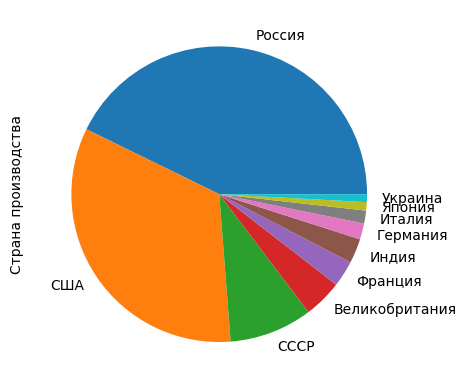

In [55]:
df['Страна производства'].value_counts().head(10).plot(kind='pie');

### Plotly

In [56]:
top_countries = set(df['Страна производства'].value_counts().head(10).index)
top_countries = df['Страна производства'].apply(lambda x: 'Other' if x not in top_countries else x).\
    value_counts().to_frame('Кол-во фильмов').reset_index().rename(columns={'index':'Страна производства'})
top_countries

Страна производства  Кол-во фильмов
0               Россия           35240
1                  США           27585
2                Other           14017
3                 СССР            7485
4       Великобритания            3463
5              Франция            2363
6                Индия            2206
7             Германия            1446
8               Италия            1160
9               Япония             757
10             Украина             705

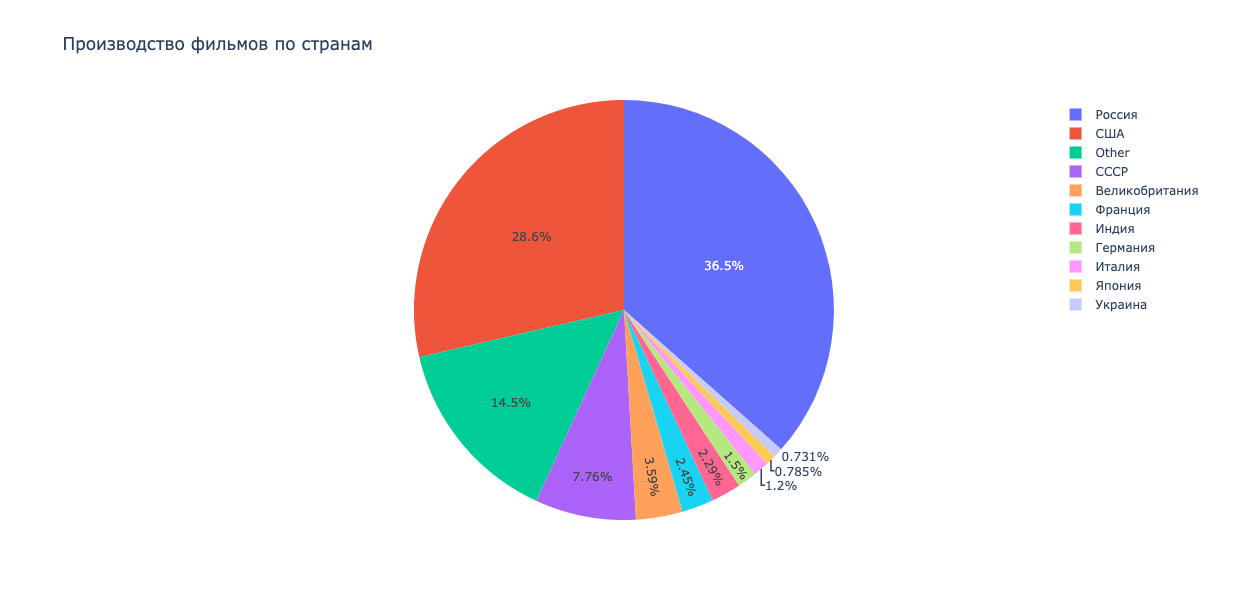

In [57]:
fig = px.pie(top_countries, 
             values='Кол-во фильмов', 
             names='Страна производства', 
             title='Производство фильмов по странам',
             width=1000, height=600
            )
fig.show()

## Histogram (Гистограмма)

Главное отличие гистограммы от барплота - на гистограмме у нас одна переменная и мы хотим изучить только ее: сколько объектов с тем или иным значением (в промежуке значений), а барплот - это значения по категориям.

Посмотрим на распределение длин фильмов

### Pandas

In [58]:
times = (df["Продолжительность демонстрации, часы"] * 60 + df["Продолжительность демонстрации, минуты"]).sort_values()

In [59]:
print(f'{type(times) = }')
times.head()

type(times) = <class 'pandas.core.series.Series'>


38738    0.0
72648    0.0
75524    0.0
75526    0.0
59928    0.0
dtype: float64

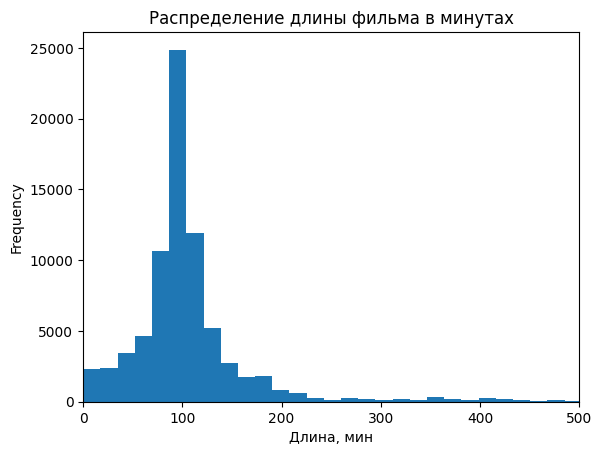

In [63]:
times.plot(kind='hist', bins=1000, xlim=(0, 500), title="Распределение длины фильма в минутах")
plt.xlabel("Длина, мин");

<Figure size 1000x600 with 0 Axes>

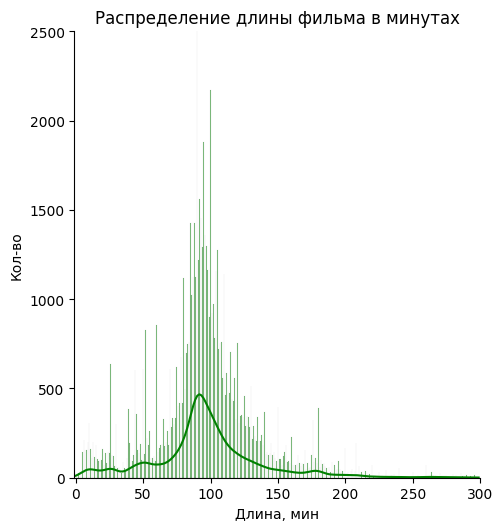

In [65]:
fig = plt.figure(figsize=(10, 6))
sns.displot(times[times < 300], bins=1000, color='green', kde=True)
plt.xlim((-1, 300))
plt.ylim((0, 2500))
plt.title('Распределение длины фильма в минутах')
plt.ylabel('Кол-во')
plt.xlabel('Длина, мин');

### Plotly

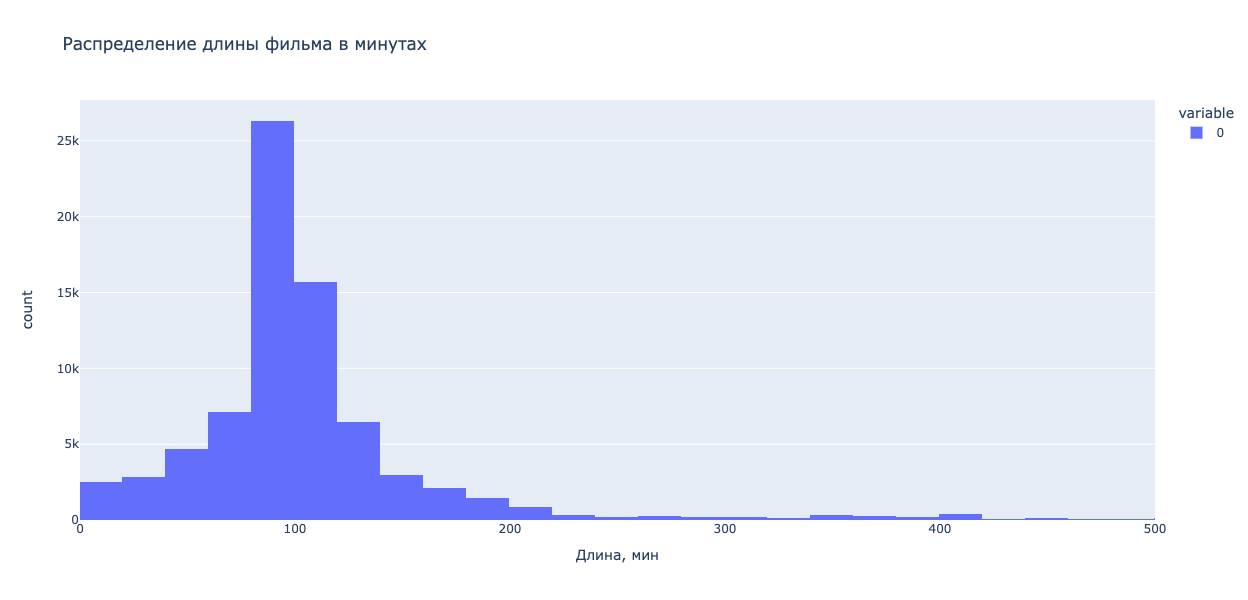

In [66]:
fig = px.histogram(
    times, nbins=1000,
    labels={"value": "Длина, мин"}, 
    title='Распределение длины фильма в минутах',
    range_x=[0,500],
    width=1000, height=600
)
fig.show()

## Heatmap

Хитмэп нужен, когда у нас есть 3 переменные.

Для этого типа графика обычно приходится подготавливать данные.
Посмотрим, в какие дни недели стартуют фильмы разных видов:

1. Почистить текст, привести в удобную форму
2. Посчитать, сколько фильмов какого типа выходит по дням недели
3. Трансформировать данные в таблицу дни x виды
3. Отнормировать (превратить в показатели доли дня в общем числе фильмов категории)

In [67]:
df2 = df[["Вид Фильма", "Дата начала показа фильма"]]
df2["Дата начала показа фильма"] = df2["Дата начала показа фильма"].apply(lambda x: x.weekday())

In [68]:
df2 = df2.groupby(["Вид Фильма", "Дата начала показа фильма"], as_index=False).size()
df2.head()

Вид Фильма  Дата начала показа фильма  size
0            NA                        0.0     3
1            NA                        3.0     1
2            NA                        4.0     1
3  Анимационный                        0.0  2239
4  Анимационный                        1.0  2291

Превращаем в таблицу нужного вида

In [69]:
df2 = df2.pivot_table(index="Вид Фильма", columns="Дата начала показа фильма", values="size").fillna(0)
df2

Дата начала показа фильма       0.0      1.0      2.0      3.0     4.0    5.0  \
Вид Фильма                                                                      
NA                              3.0      0.0      0.0      1.0     1.0    0.0   
Анимационный                 2239.0   2291.0   2196.0   2265.0  1843.0  264.0   
Документальный               1708.0   1794.0   1990.0   2039.0  1634.0  296.0   
Кинопериодика                 106.0    131.0     91.0    101.0    97.0    3.0   
Музыкально-развлекательный      2.0      4.0      4.0      9.0     2.0    2.0   
Научно-популярный             901.0    802.0    852.0    856.0   760.0   72.0   
Прочие                       2850.0   2840.0   2806.0   3156.0  2105.0   66.0   
Художественный              11920.0  11805.0  10020.0  12108.0  9487.0  753.0   

Дата начала показа фильма     6.0  
Вид Фильма                         
NA                            0.0  
Анимационный                 69.0  
Документальный              159.0  
Кинопериодика                 4.0  
Музыкально-развлекательный    0.0  
Научно-популярный            28.0  
Прочие                       46.0  
Художественный              418.0

Превращаем в доли: делим на сумму в строке.

In [70]:
df3 = df2.div(df2.sum(axis=1), axis=0)
df3

Дата начала показа фильма        0.0       1.0       2.0       3.0       4.0  \
Вид Фильма                                                                     
NA                          0.600000  0.000000  0.000000  0.200000  0.200000   
Анимационный                0.200501  0.205158  0.196651  0.202830  0.165040   
Документальный              0.177547  0.186486  0.206861  0.211954  0.169854   
Кинопериодика               0.198874  0.245779  0.170732  0.189493  0.181989   
Музыкально-развлекательный  0.086957  0.173913  0.173913  0.391304  0.086957   
Научно-популярный           0.210958  0.187778  0.199485  0.200421  0.177944   
Прочие                      0.205494  0.204773  0.202322  0.227558  0.151777   
Художественный              0.210932  0.208897  0.177311  0.214259  0.167879   

Дата начала показа фильма        5.0       6.0  
Вид Фильма                                      
NA                          0.000000  0.000000  
Анимационный                0.023641  0.006179  
Документальный              0.030769  0.016528  
Кинопериодика               0.005629  0.007505  
Музыкально-развлекательный  0.086957  0.000000  
Научно-популярный           0.016858  0.006556  
Прочие                      0.004759  0.003317  
Художественный              0.013325  0.007397

Убираем те, где мало данных

In [71]:
df3 = df3.drop(['NA', "Музыкально-развлекательный", "Кинопериодика"])
df3

Дата начала показа фильма       0.0       1.0       2.0       3.0       4.0  \
Вид Фильма                                                                    
Анимационный               0.200501  0.205158  0.196651  0.202830  0.165040   
Документальный             0.177547  0.186486  0.206861  0.211954  0.169854   
Научно-популярный          0.210958  0.187778  0.199485  0.200421  0.177944   
Прочие                     0.205494  0.204773  0.202322  0.227558  0.151777   
Художественный             0.210932  0.208897  0.177311  0.214259  0.167879   

Дата начала показа фильма       5.0       6.0  
Вид Фильма                                     
Анимационный               0.023641  0.006179  
Документальный             0.030769  0.016528  
Научно-популярный          0.016858  0.006556  
Прочие                     0.004759  0.003317  
Художественный             0.013325  0.007397

### Seaborn

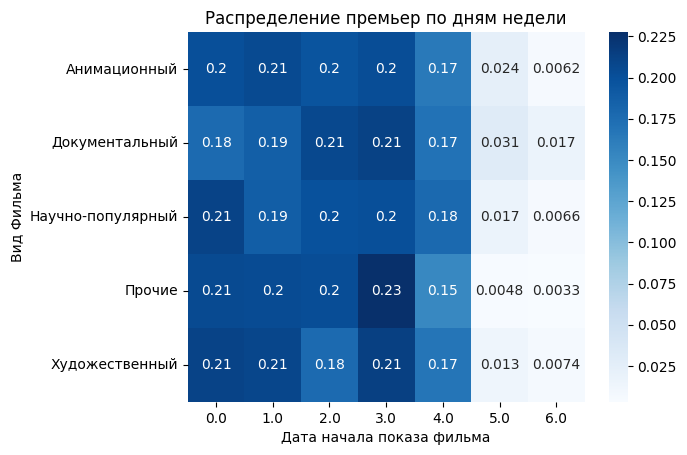

In [73]:
sns.heatmap(df3, annot=True, cmap='Blues')
plt.title("Распределение премьер по дням недели");

### Plotly

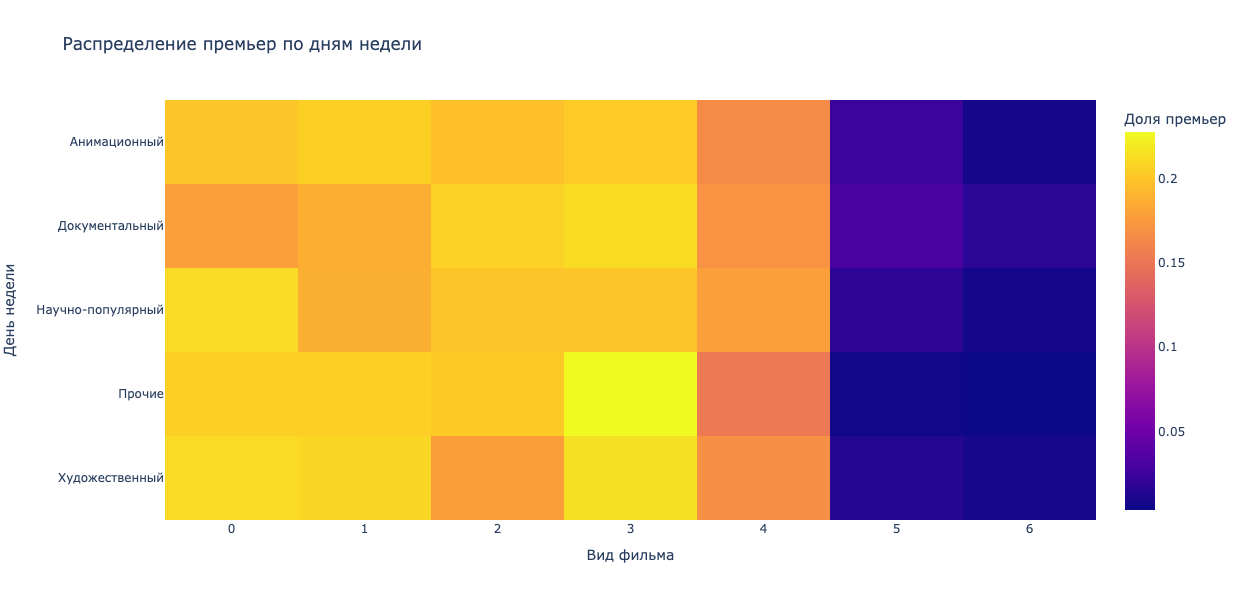

In [74]:
fig = px.imshow(
    df3, 
    labels=dict(x="Вид фильма", y="День недели", color="Доля премьер"),
    # text_auto=True,
    title="Распределение премьер по дням недели",
    width=1000, height=600
)
fig.show()

Особенной разницы нет

## Wordcloud

Один из видов визуализации текста - это облако слов. В зависимости от частотности слова меняется его размер на картинке

In [75]:
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import wordpunct_tokenize

morph = MorphAnalyzer()

In [76]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'мочь', 'свой'])

In [77]:
def lemmatize(x):
    if type(x) != str:
        return ""
    text = wordpunct_tokenize(x)
    result = []
    for word in text:
        if word.isalpha():
            nf = morph.parse(word)[0].normal_form
            if nf not in stops:
                result.append(nf)
    return " ".join(result)

In [78]:
text = ' '.join(df["Аннотация"].head(2000).apply(lemmatize).values)

In [79]:
wordcloud = WordCloud(
    background_color ='black',
    width = 800,
    height = 800, 
).generate(text)

In [80]:
type(wordcloud)

wordcloud.wordcloud.WordCloud

In [132]:
wordcloud.to_array().shape

(800, 800, 3)

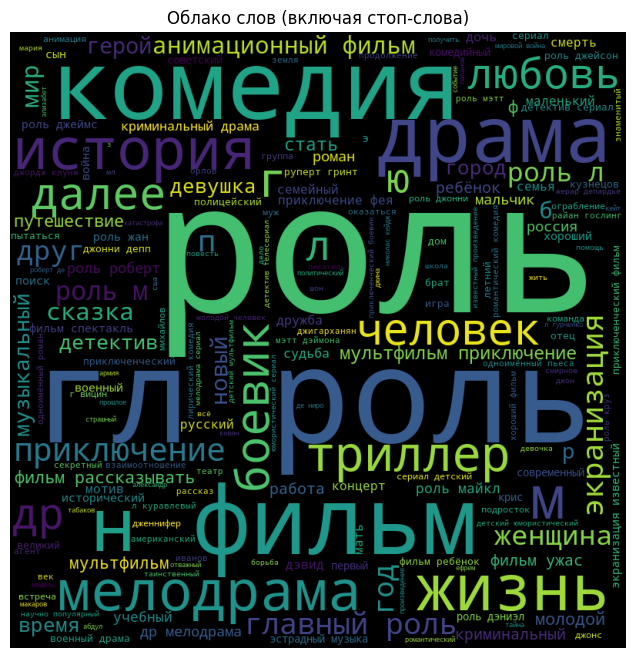

In [81]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов (включая стоп-слова)')
plt.show()